
#Part 1: Binary Classification with Perceptron using Stochastic Gradient Descent and Batch/MiniBatch Gradient Descent (13 marks)

You are to implement the Perceptron algorithm with

1.   Stochastic Gradient Descent (SGD) AND
2.   Either Batch Gradient Descent (BGD) or MiniBatch Gradient Descent (Mini BGD)

You can choose your variation of Gradient Descent from here

https://sebastianraschka.com/faq/docs/sgd-methods.html

but please state which version you are implementing.


Submission deadline is **26th April (Tuesday), 2PM**. Submission link (via Google Form) will be updated on Spectrum. You are to submit a link to your colab notebook. If there are parts where the requirement is unclear please inform me. 

There are no extra marks for early submission. If you are able to complete it rather quickly, consider how relatively easy you find the assignment to be and the fact that it is done and dusted as a reward itself. 

In this assignment, you will learn (explicitly or implicitly)


1.   How to update weights with Grad Descent in the Perceptron algorithm
2.   The difference between Stochastic Grad Descent, Batch Grad Descent, Mini Batch Grad Descent
3.   How to create your own artificial dataset 



This assignment is inspired by Quoc V. Lee's introductory tutorial on Deep Learning: https://ai.stanford.edu/~quocle/tutorial1.pdf

#What is (not) allowed

Your are not allowed to use external dataset. You must create your own.

You can complete the assignment by importing just these:

numpy, random, math, matplotlib, mpl_toolkits(mplot3d)


No PyTorch (it's only a single layer perceptron), no sklearn (sklearn shuffle is allowed though), no pandas 



#The background problem
You are stuck in your room and trying to decide whether you should watch the movie `Godzilla' or not. You ask your close friends Mary and John, who have watched the movie to hear their opinions about the movie. Mary gave a rating of 2 and John gave a rating of 10. Ratings leaning more towards the positive indicate *that* particular movie is good. 

Given these ratings, it is difficult for you to decide if it is worth watching the movie, but thankfully, you have kept a table of their ratings for some movies in the past. For each movie, you also noted whether you liked the movie or not. Maybe you can use this data to decide if you should watch 'Godzilla'. 

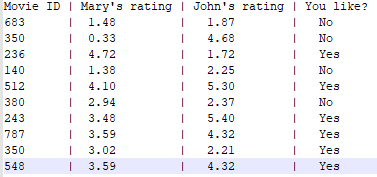

The dataset in the table above is just an example. In this task, you are asked to write a Perceptron algorithm with Stochastic Gradient Descent (SGD) and BGD/Mini BGD to solve a Binary Classification problem as stated in the reference by Quoc V Lee. However rather than give you the dataset, you are first tasked to create your own unique dataset of Mary's and John's ratings. 

##Create your own dataset
Step 1: Take Y samples of `Yes' class where $Y \sim \mathcal{N}(\mu_{Yes},\sigma_{Yes})$

Step:2: Take N samples of 'No' class where $N \sim \mathcal{N}(\mu_{No},\sigma_{No})$.

This can be achieved as below
1. Pick a coordinate, say (a,b) as the centre of your Yes class. 
2. Generate $Y_a$ and $Y_b$ datapoints sampled from a Normal distribution such that $Y_a \sim (\mu_a,\sigma_a)$ and $Y_b \sim (\mu_b,\sigma_b)$. The number of datapoints must be the same. 
3. The pair of ($Y_a, Y_b$) is your datapoints for your Yes class.
4. You choose the values for all means and standard deviations. 


You can set the number of observations of both classes the same i.e $Y=N$. Or you can have an imbalance dataset i.e $Y>N$ where $Y$ is over represented. For each class, sample size of >100 is preferrable as that is usually enough for the distribution to shape like a Normal distribution. If (a,b) and (c,d) are the centres for the Yes and No classes, make sure they are not too far apart and yet not too close as well. Make sure there are some overlapped between datapoints of No and Yes class. As you can see, both classes are normally distributed. You would want to mix/shuffle the datapoints in your dataset.

Remember to fix random seed when initializing the dataset for reproducibility. Example given below

```
np.random.seed(3)
x=np.random.rand(3)
# x will give you the same set of random numbers
```



An example of the dataset I've created is shown below. You are required to visualize your dataset in the same manner.

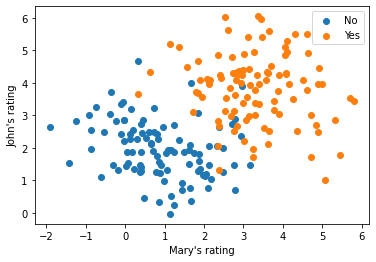

#Training and test data

After you've created your dataset, you can choose to split your data into training and testing dataset with ratio choice of your own (eg 70% training, 30% test). But since we are creating our own dataset, you can use the whole dataset you've created for training and later create a test dataset sampled as $T \sim (\mu_T,\sigma_T)$ with a centre of your choice.

#Code Perceptron algorithm with SGD and BGD/Mini BGD

Once you have created the dataset then it's time code the Perceptron. Activation function is logistic. Error/loss function is Sum of Squared. For SGD implementation, the only differences between the previous Perceptron are (1) Pick a random example for training and (2) Update the weights using gradient.  Given the input pattern and weights defined as

$\mathbf{x}=(x^1,...,x^M)$ 

$\mathbf{w}=(w_1,...,w_M)$ 

and summation function as (b is the bias)

$v=\mathbf{wx^{\intercal}} + b $

and activation function as

$f(v) = \frac{1}{1+e^{-v}}$

**The algorithm using SGD is then as follow**

---



1)  Initilize weights  $\mathbf{w}$ and bias $b$ randomly. For reproducibility purposes, use np.random.seed. Choose a learning rate $\alpha$

2)  Pick a random example $\mathbf{x_k}=(x^1_k,...,x^M_k)$. Previously we iterated through each input pattern.

3)  Compute partial derivatives (gradient components) for each weight $w_i \in \mathbf{w}$ and bias $b$ as


> $\frac{\partial{\epsilon}}{\partial{w_i}} = 2(f(v)-y)f(v)(1-f(v))x^i_k$


> $\frac{\partial{\epsilon}}{\partial{b}} = 2(f(v)-y)f(v)(1-f(v))$

4) Update the weights and bias as 

> $w_i=w_i-\alpha*\frac{\partial{\epsilon}}{\partial{w_i}}$

> $b=w_i-\alpha*\frac{\partial{\epsilon}}{\partial{b}}$

where $y$ is the actual output.

5) Repeat step 2 until convergence.

**Please refer to https://sebastianraschka.com/faq/docs/sgd-methods.html for detail algorithm using BGD/Mini BGD. Choose one. The main difference is you are summing the error over all/mini batch training examples and updating the weights using this sum of error.**



#Expected Output

The algorithm is as above, where it is only rewritten here in vector, matrix notation instead of summation notation as in the reference paper to increase readability. By giving you the reference paper, you are expected to IDENTIFY which variant of SGD does the author of the paper is refering to and IMPLEMENT it. I've used `iteration' as this is what the original paper referred to. There are many variants of SGD as summarized by  

https://sebastianraschka.com/faq/docs/sgd-methods.html



You are required to produce  iteration/epoch vs error and iteration/epoch vs accuracy graphs. An example is given as below.This was evaluated on the training dataset.  

One way to calculate error is for each iteration, after you have updated the weights, calculate the predicted output using the weights you have updated on all inputs of the training dataset, and compare it with the actual output.  The accuracy is then how many % of the training dataset were you able to predict correctly.

For test dataset, no iteration nor any graph needed. Only need to calculate the accuracy of the predicted output vs actual output of your test dataset.

At this stage need to know what is the difference between epoch vs batch vs minibatch

You are required to produce your own version of figures as below. I'm implementing SGD and BGD, you can choose to do the same or  SGD and Mini BGD.

## SGD results
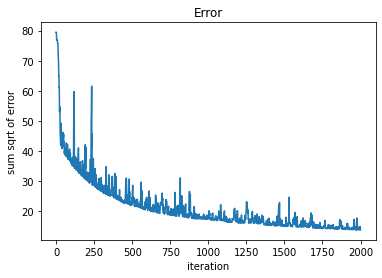

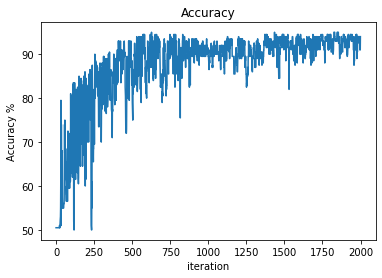

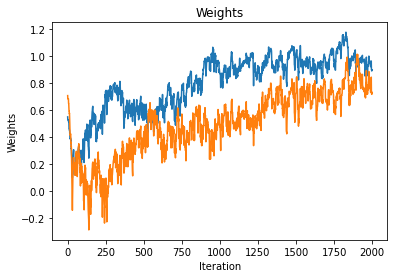


## BGD results
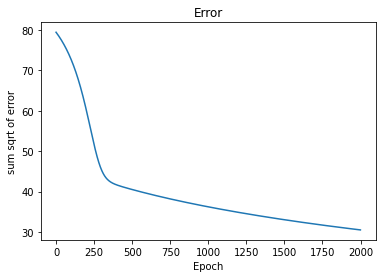

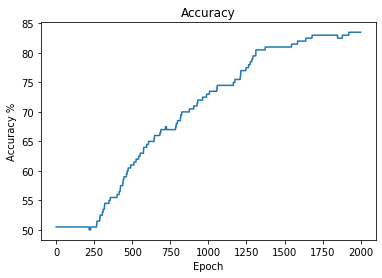

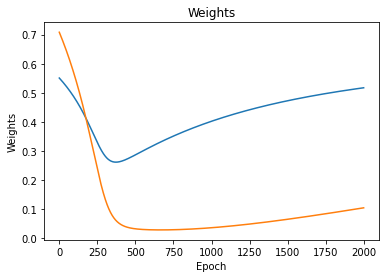

#Questions to ponder upon


1.   Which one is 'smoother' and why is that?
2.   Which one converges faster and why is that?
3.   What happens to the weights as the algorithm converges?
4.   What is the difference between SGD, BGD and Mini BGD?



#Visualize the plot line 

Using the final parameters predicted, derive the equation for

> $v = x_1w_1+x_2w_2+...+x_Mw_M$

Set $v=0$ and plot the decision line.


#SGD
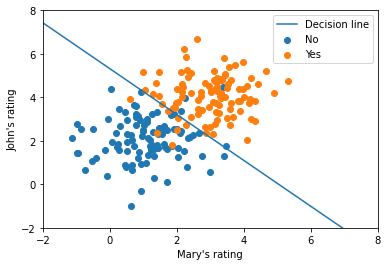

#BGD
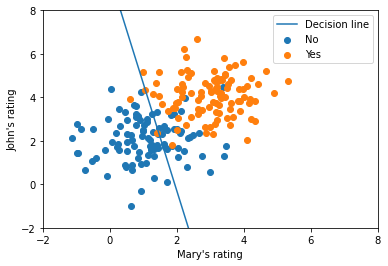


#Compute Accuracy by class

For each implementation of the Gradient Descent version, compute the accuracy by the No and Yes class. Example of result is shown as below. 


SGD \
-------Accuracy by class-------------\
No:91.0%   Yes:96.0%

\

BGD \
-------Accuracy by class-------------\
No:84.0%   Yes:83.0%



#Part 2: Show results for varied dataset (2 marks)



1.   Choose either SGD or BGD/Mini BGD that you have implemented in Part 1
2.   Change the dataset in your first implementation by 


*   Changing the mean and standard deviation
*   Change from normal distribution to something else eg: Log-Normal distribution
*   If you've done Part 1 with balance dataset, now is the time to try with imbalance dataset.


3.   Compute the algorithm chosen in step 1 and show the figure results (error, accuracy, weights updates and  visualization of decision boundary)   
4.   Compute the accuracy by class
